In [65]:
import pandas as pd
import os

In [66]:
os.getcwd()

'/Users/akankshamishra/Desktop/DataScience/Data sets'

In [67]:
os.chdir("/Users/akankshamishra/Desktop/DataScience/Data sets/")

In [68]:
full_data = pd.read_csv("topic_modeling.csv")

In [69]:
full_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [70]:
# Subsetting the dataframe to include the columns
data = full_data[["Consumer complaint narrative", "Product"]]
data.dropna(inplace = True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
data.head()

,Consumer complaint narrative,Product
1,When my loan was switched over to Navient i wa...,Student loan
2,I tried to sign up for a spending monitoring p...,Credit card or prepaid card
7,"My mortgage is with BB & T Bank, recently I ha...",Mortgage
13,The entire lending experience with Citizens Ba...,Mortgage
14,My credit score has gone down XXXX points in t...,Credit reporting


In [72]:
# Renaming the columns
data.columns = ["X","y"]

In [73]:
data["X"][1]

'When my loan was switched over to Navient i was never told that i had a deliquint balance because with XXXX i did not. When going to purchase a vehicle i discovered my credit score had been dropped from the XXXX into the XXXX. I have been faithful at paying my student loan. I was told that Navient was the company i had delinquency with. I contacted Navient to resolve this issue you and kept being told to just contact the credit bureaus and expalin the situation and maybe they could help me. I was so angry that i just hurried and paid the balance off and then after tried to dispute the delinquency with the credit bureaus. I have had so much trouble bringing my credit score back up.'

In [74]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator

In [75]:
stopwords_set = set(stopwords.words('english'))
stopwords_set.add('xxxx')
custom = list(stopwords_set)+list(punctuation)+['``', "'s", "...", "n't"]

In [76]:
# Storing first five complaints
first_five_complaints = data.iloc[0:5,:]
BoW = list(first_five_complaints["X"].str.lower())

In [77]:
BoW

['when my loan was switched over to navient i was never told that i had a deliquint balance because with xxxx i did not. when going to purchase a vehicle i discovered my credit score had been dropped from the xxxx into the xxxx. i have been faithful at paying my student loan. i was told that navient was the company i had delinquency with. i contacted navient to resolve this issue you and kept being told to just contact the credit bureaus and expalin the situation and maybe they could help me. i was so angry that i just hurried and paid the balance off and then after tried to dispute the delinquency with the credit bureaus. i have had so much trouble bringing my credit score back up.',
 'i tried to sign up for a spending monitoring program and capital one will not let me access my account through them',
 'my mortgage is with bb & t bank, recently i have been investigating ways to pay down my mortgage faster and i came across biweekly mortgage calculator on bb & t \'s website. it\'s a ni

In [78]:
BoW = [word_tokenize(i) for i in BoW]
BoW = [item for sublist in BoW for item in sublist]

In [79]:
print(BoW)

['when', 'my', 'loan', 'was', 'switched', 'over', 'to', 'navient', 'i', 'was', 'never', 'told', 'that', 'i', 'had', 'a', 'deliquint', 'balance', 'because', 'with', 'xxxx', 'i', 'did', 'not', '.', 'when', 'going', 'to', 'purchase', 'a', 'vehicle', 'i', 'discovered', 'my', 'credit', 'score', 'had', 'been', 'dropped', 'from', 'the', 'xxxx', 'into', 'the', 'xxxx', '.', 'i', 'have', 'been', 'faithful', 'at', 'paying', 'my', 'student', 'loan', '.', 'i', 'was', 'told', 'that', 'navient', 'was', 'the', 'company', 'i', 'had', 'delinquency', 'with', '.', 'i', 'contacted', 'navient', 'to', 'resolve', 'this', 'issue', 'you', 'and', 'kept', 'being', 'told', 'to', 'just', 'contact', 'the', 'credit', 'bureaus', 'and', 'expalin', 'the', 'situation', 'and', 'maybe', 'they', 'could', 'help', 'me', '.', 'i', 'was', 'so', 'angry', 'that', 'i', 'just', 'hurried', 'and', 'paid', 'the', 'balance', 'off', 'and', 'then', 'after', 'tried', 'to', 'dispute', 'the', 'delinquency', 'with', 'the', 'credit', 'bureaus

In [80]:
# Tokenizing the words
BoW = [x for x in BoW if x not in custom]

In [81]:
print(BoW)

['loan', 'switched', 'navient', 'never', 'told', 'deliquint', 'balance', 'going', 'purchase', 'vehicle', 'discovered', 'credit', 'score', 'dropped', 'faithful', 'paying', 'student', 'loan', 'told', 'navient', 'company', 'delinquency', 'contacted', 'navient', 'resolve', 'issue', 'kept', 'told', 'contact', 'credit', 'bureaus', 'expalin', 'situation', 'maybe', 'could', 'help', 'angry', 'hurried', 'paid', 'balance', 'tried', 'dispute', 'delinquency', 'credit', 'bureaus', 'much', 'trouble', 'bringing', 'credit', 'score', 'back', 'tried', 'sign', 'spending', 'monitoring', 'program', 'capital', 'one', 'let', 'access', 'account', 'mortgage', 'bb', 'bank', 'recently', 'investigating', 'ways', 'pay', 'mortgage', 'faster', 'came', 'across', 'biweekly', 'mortgage', 'calculator', 'bb', 'website', 'nice', 'easy', 'use', 'calculator', 'plug', 'interest', 'rate', 'mortgage', 'amount', 'mortgage', 'term', 'payment', 'type', 'calculates', 'accelerated', 'bi-weekly', 'payment', 'shows', 'much', 'quicker'

In [82]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akankshamishra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
# Initializing wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

In [84]:
# Lemmatizing the bag of words
BoW = [lemmatizer.lemmatize(i) for i in BoW]

In [85]:
# Create a dictionary from the counter
BoW_dict = dict(Counter(BoW))

# Sort the words
sorted_d = sorted(BoW_dict.items(), key = operator.itemgetter(1), reverse = True)
print(sorted_d)

[('payment', 12), ('closing', 12), ('account', 11), ('credit', 8), ('mortgage', 8), ('rate', 8), ('would', 8), ('bank', 7), ('fixed', 7), ('could', 6), ('property', 6), ('form', 6), ('loan', 5), ('told', 5), ('year', 5), ('day', 5), ('disclosure', 5), ('u', 5), ('score', 4), ('back', 4), ('bb', 4), ('amount', 4), ('30', 4), ('number', 4), ('received', 4), ('product', 4), ('checking', 4), ('decided', 4), ('letter', 4), ('--', 4), ('please', 4), ('close', 4), ('navient', 3), ('kept', 3), ('contact', 3), ('tried', 3), ('sign', 3), ('pay', 3), ('website', 3), ('bi-weekly', 3), ('customer', 3), ('set', 3), ('offer', 3), ('send', 3), ('understand', 3), ('asked', 3), ('3', 3), ('make', 3), ('like', 3), ('citizen', 3), ('arm', 3), ('30yr', 3), ('requested', 3), ('corrected', 3), ('right', 3), ('date', 3), ('email', 3), ('need', 3), ('address', 3), ('deposit', 3), ('increased', 3), ('balance', 2), ('going', 2), ('delinquency', 2), ('bureau', 2), ('help', 2), ('much', 2), ('program', 2), ('one',

In [86]:
from collections import Counter
import operator
import numpy as np
import nltk
from textblob import TextBlob

In [87]:
print(len(BoW))

587


In [88]:
# Joining the list back to sentences
BoW_joined = " ".join(BoW)

# Converting the data to textblob
blob = TextBlob(BoW_joined)

In [89]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/akankshamishra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [90]:
print(blob.tags)

[('loan', 'NN'), ('switched', 'VBD'), ('navient', 'JJ'), ('never', 'RB'), ('told', 'VBD'), ('deliquint', 'NN'), ('balance', 'NN'), ('going', 'VBG'), ('purchase', 'NN'), ('vehicle', 'NN'), ('discovered', 'VBD'), ('credit', 'NN'), ('score', 'NN'), ('dropped', 'VBD'), ('faithful', 'JJ'), ('paying', 'VBG'), ('student', 'NN'), ('loan', 'NN'), ('told', 'VBD'), ('navient', 'JJ'), ('company', 'NN'), ('delinquency', 'NN'), ('contacted', 'VBD'), ('navient', 'JJ'), ('resolve', 'NN'), ('issue', 'NN'), ('kept', 'VBD'), ('told', 'VBN'), ('contact', 'NN'), ('credit', 'NN'), ('bureau', 'NN'), ('expalin', 'JJ'), ('situation', 'NN'), ('maybe', 'RB'), ('could', 'MD'), ('help', 'VB'), ('angry', 'JJ'), ('hurried', 'VBN'), ('paid', 'VBN'), ('balance', 'NN'), ('tried', 'VBD'), ('dispute', 'JJ'), ('delinquency', 'NN'), ('credit', 'NN'), ('bureau', 'NN'), ('much', 'JJ'), ('trouble', 'NN'), ('bringing', 'VBG'), ('credit', 'NN'), ('score', 'NN'), ('back', 'RB'), ('tried', 'VBD'), ('sign', 'NN'), ('spending', 'NN

In [92]:
from collections import Counter
d = dict(Counter(BoW))
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
top_10 = sorted_d[:10]
print(top_10)

[('payment', 12), ('closing', 12), ('account', 11), ('credit', 8), ('mortgage', 8), ('rate', 8), ('would', 8), ('bank', 7), ('fixed', 7), ('could', 6)]


In [93]:
from collections import Counter
import operator
import numpy as np
import nltk
from textblob import TextBlob

#Storing only the top 10 words
top_words=[]
for x in top_10:
    top_words.append(x[0])

In [94]:
print(top_words)

['payment', 'closing', 'account', 'credit', 'mortgage', 'rate', 'would', 'bank', 'fixed', 'could']


In [95]:
#Extracting the tags
tags = blob.tags

In [96]:
#Initialising an empty list
nouns = []

#Extracing the words with NN tags
for i in tags:
    if i[1] == "NN":
        nouns.append(i[0])

In [97]:
print(nouns)

['loan', 'deliquint', 'balance', 'purchase', 'vehicle', 'credit', 'score', 'student', 'loan', 'company', 'delinquency', 'resolve', 'issue', 'contact', 'credit', 'bureau', 'situation', 'balance', 'delinquency', 'credit', 'bureau', 'trouble', 'credit', 'score', 'sign', 'spending', 'program', 'capital', 'let', 'access', 'account', 'mortgage', 'bank', 'way', 'pay', 'mortgage', 'mortgage', 'calculator', 'use', 'calculator', 'interest', 'rate', 'mortgage', 'amount', 'mortgage', 'term', 'payment', 'type', 'payment', 'show', 'pay', 'loan', 'pay', 'year', 'mortgage', 'year', 'bb', 'customer', 'service', 'number', 'inquire', 'get', 'payment', 'plan', 'offer', 'payment', 'plan', 'payment', 'amount', 'money', 'account', 'payment', 'amount', 'day', 'program', 'bb', 'office', 'number', 'someone', 'product', 'day', 'phone', 'call', 'manager', 'offer', 'product', 'customer', 'payment', 'service', 'link', 'planning', 'center', 'tab', 'customer', 'sound', 'advertising', 'http', 'lending', 'experience', 

In [98]:
#Comparing the two lists to extract the common elements        
top_nouns = [x for x in top_words if x in nouns]
print(top_nouns)

['payment', 'closing', 'account', 'credit', 'mortgage', 'rate', 'bank']


In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents called sents

# Subsetting the 'X' column
all_text = first_five_complaints["X"]
#Converting that to a Dataframe
all_text = pd.DataFrame(all_text)
#Giving the column name as Text from X
all_text.columns = ["Text"]
#Converting the text to lowercase
all_text["Text"] = all_text["Text"].str.lower()

# Initialising the tfidf vectorizer with the default stopword list 
tfidf = TfidfVectorizer(stop_words="english")

#Vectorizing 'X' column
vector =tfidf.fit_transform(all_text["Text"])

#Converting vector into an array
X= vector.toarray()

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.203219,0.000000,0.00000
1,0.00000,0.000000,0.000000,0.00000,0.372708,0.249607,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2,0.06819,0.055016,0.000000,0.06819,0.000000,0.045668,0.000000,0.000000,0.06819,0.000000,...,0.000000,0.06819,0.204571,0.204571,0.000000,0.000000,0.06819,0.038417,0.055016,0.06819
3,0.00000,0.085335,0.105771,0.00000,0.000000,0.188896,0.035257,0.070514,0.00000,0.035257,...,0.035257,0.00000,0.000000,0.000000,0.035257,0.035257,0.00000,0.158906,0.085335,0.00000
4,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.462143,0.000000,0.00000


In [100]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)

print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [101]:
terms = tfidf.get_feature_names()
topics = []
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append(t[0])
final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]
for x in final_topic_list:
    print (x)

['Topic 0: ', 'xxxx', 'credit', 'score', 'significant', 'navient', 'closing', 'told']
['Topic 1: ', 'mortgage', 'account', 'payment', 'closing', 'bb', 'program', 'access']
['Topic 2: ', 'access', 'capital', 'let', 'monitoring', 'spending', 'sign', 'program']
['Topic 3: ', 'closing', 'fixed', 'form', 'property', 'disclosure', 'rate', 'close']
['Topic 4: ', 'significant', 'xxxx', 'agencies', 'decrease', 'gone', 'month', 'points']


In [102]:
svd_model.components_


array([[ 0.01692055,  0.04740929,  0.04184204, ...,  0.4077978 ,
         0.04740929,  0.01692055],
       [ 0.0385684 ,  0.0685289 ,  0.04637141, ..., -0.14921617,
         0.0685289 ,  0.0385684 ],
       [-0.03011491, -0.03424992, -0.01233698, ..., -0.01795826,
        -0.03424992, -0.03011491],
       [-0.04527131,  0.03302672,  0.08620707, ...,  0.04455295,
         0.03302672, -0.04527131],
       [ 0.00566724, -0.00560768, -0.01261781, ...,  0.20563592,
        -0.00560768,  0.00566724]])

In [103]:
list(enumerate(svd_model.components_))

[(0, array([0.01692055, 0.04740929, 0.04184204, 0.01692055, 0.04823195,
         0.11835899, 0.01394735, 0.02789469, 0.01692055, 0.01394735,
         0.04184204, 0.01692055, 0.1034124 , 0.06056308, 0.01692055,
         0.01692055, 0.01394735, 0.02789469, 0.04184204, 0.03615666,
         0.01394735, 0.02789469, 0.01394735, 0.02789469, 0.12112617,
         0.08116718, 0.01394735, 0.0676822 , 0.01692055, 0.01394735,
         0.05076165, 0.01692055, 0.06056308, 0.12112617, 0.01394735,
         0.01692055, 0.0338411 , 0.01692055, 0.01692055, 0.01692055,
         0.04823195, 0.01394735, 0.01692055, 0.01394735, 0.02789469,
         0.01394735, 0.04740929, 0.04184204, 0.02789469, 0.05578938,
         0.01394735, 0.16736815, 0.01692055, 0.01692055, 0.01394735,
         0.01394735, 0.06056308, 0.01394735, 0.01394735, 0.07136718,
         0.06056308, 0.01394735, 0.0338411 , 0.01394735, 0.04184204,
         0.31943359, 0.01692055, 0.0338411 , 0.04184204, 0.01394735,
         0.02789469, 0.03855542

In [107]:
#pip install gensim

In [108]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [109]:
stop_word = stopwords_set
exclude = set(string.punctuation)

In [110]:
lemma = WordNetLemmatizer()

In [111]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop_word])
    punc_free = "".join([i for i in stop_free if i not in exclude])
    normalized = " ".join([lemma.lemmatize(i) for i in punc_free.split()])
    return normalized

In [112]:
list_of_docs = data["X"].tolist()

In [113]:
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:2])

[['loan', 'switched', 'navient', 'never', 'told', 'deliquint', 'balance', 'not', 'going', 'purchase', 'vehicle', 'discovered', 'credit', 'score', 'dropped', 'xxxx', 'faithful', 'paying', 'student', 'loan', 'told', 'navient', 'company', 'delinquency', 'with', 'contacted', 'navient', 'resolve', 'issue', 'kept', 'told', 'contact', 'credit', 'bureau', 'expalin', 'situation', 'maybe', 'could', 'help', 'me', 'angry', 'hurried', 'paid', 'balance', 'tried', 'dispute', 'delinquency', 'credit', 'bureau', 'much', 'trouble', 'bringing', 'credit', 'score', 'back', 'up'], ['tried', 'sign', 'spending', 'monitoring', 'program', 'capital', 'one', 'let', 'access', 'account']]


In [114]:
dictionary = corpora.Dictionary(doc_clean)
dictionary

In [115]:
# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
#print(doc_term_matrix)

In [116]:
# Creating the LSi model
lsimodel = LsiModel(corpus = doc_term_matrix, num_topics = 5, id2word=dictionary)

In [117]:
# Creating the LSi model
lsimodel = LsiModel(corpus = doc_term_matrix, num_topics = 5, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '0.351*"xxxxxxxx" + 0.311*"credit" + 0.308*"xxxx" + 0.293*"account" + '
  '0.193*"payment" + 0.142*"report" + 0.139*"bank" + 0.132*"would" + '
  '0.132*"card" + 0.116*"information"'),
 (1,
  '-0.455*"credit" + 0.345*"xxxxxxxx" + -0.298*"consumer" + -0.240*"debt" + '
  '-0.234*"report" + -0.225*"agency" + -0.209*"information" + '
  '-0.204*"reporting" + -0.160*"collection" + 0.137*"bank"'),
 (2,
  '0.355*"consumer" + -0.350*"credit" + -0.277*"card" + 0.203*"law" + '
  '0.186*"criminal" + 0.178*"property" + 0.170*"information" + '
  '0.165*"mortgage" + 0.164*"agency" + 0.149*"court"'),
 (3,
  '-0.709*"xxxxxxxx" + 0.391*"payment" + 0.252*"loan" + 0.133*"would" + '
  '0.107*"told" + -0.101*"usaa" + -0.101*"inquiry" + 0.088*"pay" + 0.080*"nt" '
  '+ -0.077*"report"'),
 (4,
  '-0.377*"consumer" + 0.290*"credit" + -0.258*"information" + '
  '-0.206*"payment" + 0.179*"criminal" + 0.163*"law" + 0.161*"card" + '
  '-0.155*"loan" + -0.148*"xxxxxxxx" + 0.148*"property"')]


In [118]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim.models.ldamodel import LdaModel

In [119]:
dictionary = corpora.Dictionary(doc_clean)

In [120]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [121]:
# Creating the LDA model
ldamodel = LdaModel(corpus = doc_term_matrix, num_topics = 5, id2word = dictionary, passes = 30, random_state = 20)

In [122]:
pprint(ldamodel.print_topics())

[(0,
  '0.044*"credit" + 0.029*"report" + 0.029*"account" + 0.019*"xxxx" + '
  '0.018*"information" + 0.016*"xxxxxxxx" + 0.014*"reporting" + '
  '0.011*"company" + 0.009*"debt" + 0.009*"agency"'),
 (1,
  '0.020*"account" + 0.016*"xxxx" + 0.015*"card" + 0.014*"credit" + '
  '0.011*"bank" + 0.011*"xxxxxxxx" + 0.010*"call" + 0.009*"would" + '
  '0.009*"called" + 0.008*"told"'),
 (2,
  '0.034*"debt" + 0.011*"collection" + 0.011*"company" + 0.010*"xxxx" + '
  '0.009*"law" + 0.008*"letter" + 0.008*"criminal" + 0.007*"never" + '
  '0.006*"court" + 0.006*"property"'),
 (3,
  '0.013*"debt" + 0.013*"collection" + 0.010*"credit" + 0.010*"agency" + '
  '0.006*"xxxxxxxx" + 0.006*"year" + 0.006*"right" + 0.006*"xxxx" + '
  '0.005*"letter" + 0.005*"court"'),
 (4,
  '0.028*"payment" + 0.025*"loan" + 0.016*"xxxxxxxx" + 0.010*"mortgage" + '
  '0.010*"xxxx" + 0.009*"would" + 0.008*"month" + 0.007*"year" + 0.007*"time" '
  '+ 0.006*"pay"')]


In [123]:
from gensim.models.coherencemodel import CoherenceModel

In [124]:
# Compute Perplexity
perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel,texts=doc_clean, dictionary=dictionary, coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()

In [125]:
coherence_lda

0.42714577311405055

In [126]:
perplexity_lda

-7.244060971210192

In [127]:
#pip install pyLDAvis

In [128]:
#import pyLDAvis
#import pyLDAvis.gensim 

#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

In [130]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=doc_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4),
                                                        topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Finding the dominant topic in each sentence
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.7590,"payment, loan, xxxxxxxx, mortgage, xxxx, would...","[loan, switched, navient, never, told, deliqui..."
1,1,1.0,0.9253,"account, xxxx, card, credit, bank, xxxxxxxx, c...","[tried, sign, spending, monitoring, program, c..."
2,2,1.0,0.6237,"account, xxxx, card, credit, bank, xxxxxxxx, c...","[mortgage, bb, bank, recently, investigating, ..."
3,3,4.0,0.6456,"payment, loan, xxxxxxxx, mortgage, xxxx, would...","[entire, lending, experience, citizen, bank, t..."
4,4,1.0,0.5636,"account, xxxx, card, credit, bank, xxxxxxxx, c...","[credit, score, gone, point, last, month, s, s..."
5,5,0.0,0.9685,"credit, report, account, xxxx, information, xx...","[month, back, contacted, regard, fraudulent, a..."
6,6,0.0,0.7208,"credit, report, account, xxxx, information, xx...","[victim, fraud, file, federal, trade, commissi..."
7,7,0.0,0.7322,"credit, report, account, xxxx, information, xx...","[disputing, bankruptcy, credit, report, writte..."
8,8,1.0,0.9043,"account, xxxx, card, credit, bank, xxxxxxxx, c...","[today, received, phone, call, number, listed,..."
9,9,1.0,0.9905,"account, xxxx, card, credit, bank, xxxxxxxx, c...","[gotten, 7, call, ar, resource, looking, perso..."


In [131]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9980,"credit, report, account, xxxx, information, xx...","[block, except, otherwise, provided, section, ..."
1,1.0,0.9989,"account, xxxx, card, credit, bank, xxxxxxxx, c...","[xxxxxxxx, check, deposited, account, cashier,..."
2,2.0,0.9993,"debt, collection, company, xxxx, law, letter, ...","[cfpb, supposed, guarantee, filthy, law, firm,..."
3,3.0,0.9978,"debt, collection, credit, agency, xxxxxxxx, ye...","[america, biggest, scam, credit, reporting, ag..."
4,4.0,0.9981,"payment, loan, xxxxxxxx, mortgage, xxxx, would...","[foreclosure, sale, date, xxxxxxxx, xxxxxxxx, ..."


In [134]:
#pip install WordCloud

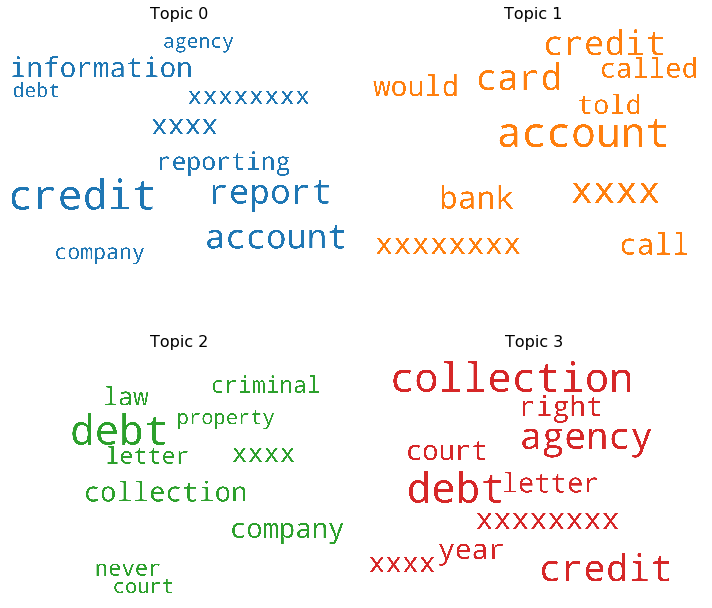

In [136]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
#fig.savefig('../images/word_cloud.png')
plt.show()